In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Setup

In [5]:
df = pd.read_csv("/content/Sunshine hours for cities in the world.csv")

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Country    0
City       0
Jan        0
Feb        0
Mar        0
Apr        0
May        0
Jun        0
Jul        0
Aug        0
Sep        0
Oct        0
Nov        0
Dec        0
Year       0
dtype: int64

In [8]:
df.head(5)

,Country,City,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year
0,Ivory Coast,Gagnoa,183.0,180.0,196.0,188.0,181.0,118.0,97.0,80.0,110.0,155.0,171.0,164.0,1823.0
1,Ivory Coast,Bouaké,242.0,224.0,219.0,194.0,208.0,145.0,104.0,82.0,115.0,170.0,191.0,198.0,2092.0
2,Ivory Coast,Abidjan,223.0,223.0,239.0,214.0,205.0,128.0,137.0,125.0,139.0,215.0,224.0,224.0,2296.0
3,Ivory Coast,Odienné,242.0,220.2,217.3,214.7,248.8,221.8,183.5,174.5,185.4,235.8,252.0,242.6,2638.6
4,Ivory Coast,Ferké,279.0,249.0,253.0,229.0,251.0,221.0,183.0,151.0,173.0,245.0,261.0,262.0,2757.0


In [9]:
df = df.rename(columns={'Year': 'Avg_Year'})

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   392 non-null    object 
 1   City      392 non-null    object 
 2   Jan       392 non-null    float64
 3   Feb       392 non-null    float64
 4   Mar       392 non-null    float64
 5   Apr       392 non-null    float64
 6   May       392 non-null    float64
 7   Jun       392 non-null    float64
 8   Jul       392 non-null    float64
 9   Aug       392 non-null    float64
 10  Sep       392 non-null    float64
 11  Oct       392 non-null    float64
 12  Nov       392 non-null    float64
 13  Dec       392 non-null    float64
 14  Avg_Year  392 non-null    float64
dtypes: float64(13), object(2)
memory usage: 46.1+ KB


## Data Analysis

In [33]:
unique_countries = df['Country'].unique()
print(unique_countries)

['Ivory Coast' 'Benin' 'Togo' 'Ghana' 'Cameroon' 'Gabon' 'Nigeria' 'Sudan'
 'Eritrea' 'Burkina Faso' 'Niger' 'Chad' 'Gambia' 'Senegal' 'Somalia'
 'Djibouti' 'Mali' 'Algeria' 'Tunisia' 'Morocco' 'Egypt' 'Libya' 'Kenya'
 'Angola' 'South Sudan' 'Tanzania' 'Ethiopia' 'Congo'
 'Democratic Republic of the Congo' 'Mauritania' 'South Africa' 'Botswana'
 'Zambia' 'Zimbabwe' 'Malawi' 'Madagascar' 'Mozambique'
 'Central African Republic' 'Uganda' 'Burundi' 'Guinea' 'Guinea-Bissau'
 'Equatorial Guinea' 'Namibia' 'Afghanistan' 'Azerbaijan' 'Lebanon'
 'Bangladesh' 'China' 'India' 'Indonesia' 'Iran' 'Iraq' 'Israel' 'Japan'
 'Kazakhstan' 'Mongolia' 'North Korea' 'Oman' 'Pakistan' 'Philippines'
 'Russia' 'Saudi Arabia' 'Singapore' 'South Korea' 'Taiwan' 'Thailand'
 'Turkey' 'United ArabEmirates' 'Uzbekistan' 'Vietnam' 'Albania' 'Armenia'
 'Austria' 'Belarus' 'Belgium' 'Bosnia and Herzegovina' 'Bulgaria'
 'Croatia' 'Czech Republic' 'Cyprus' 'Denmark' 'Estonia' 'Faroe Islands'
 'Finland' 'France' 'Georgi

In [34]:
min_values = []
max_values = []

for country in unique_countries:
    country_data = df[df['Country'] == country]
    min_value = country_data[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].min().min()
    max_value = country_data[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].max().max()

    min_values.append(min_value)
    max_values.append(max_value)

result_list = list(zip(unique_countries, min_values, max_values))
print(result_list)


[('Ivory Coast', 80.0, 279.0), ('Benin', 104.0, 282.0), ('Togo', 131.0, 285.0), ('Ghana', 77.0, 283.0), ('Cameroon', 46.0, 291.4), ('Gabon', 90.4, 176.9), ('Nigeria', 99.2, 313.0), ('Sudan', 214.0, 341.0), ('Eritrea', 217.9, 304.7), ('Burkina Faso', 217.0, 291.0), ('Niger', 235.6, 297.6), ('Chad', 201.5, 319.3), ('Gambia', 180.0, 310.0), ('Senegal', 188.0, 332.0), ('Somalia', 216.0, 293.0), ('Djibouti', 236.0, 310.0), ('Mali', 216.6, 292.0), ('Algeria', 136.0, 356.5), ('Tunisia', 145.7, 372.0), ('Morocco', 179.8, 335.0), ('Egypt', 207.7, 403.0), ('Libya', 167.4, 381.3), ('Kenya', 127.1, 321.0), ('Angola', 145.0, 233.0), ('South Sudan', 176.7, 303.8), ('Tanzania', 156.0, 341.0), ('Ethiopia', 111.6, 303.5), ('Congo', 70.0, 194.0), ('Democratic Republic of the Congo', 120.0, 318.0), ('Mauritania', 248.0, 320.0), ('South Africa', 166.1, 367.0), ('Botswana', 207.0, 332.0), ('Zambia', 142.8, 319.3), ('Zimbabwe', 190.4, 300.7), ('Malawi', 142.1, 319.3), ('Madagascar', 162.5, 324.0), ('Mozambi

In [35]:
sunlight_avg = df.groupby(['Country', 'Avg_Year'])['Avg_Year']

city_with_max_sunlight = df.loc[df.groupby(['Country', 'Avg_Year'])['Avg_Year'].idxmax()]

print(city_with_max_sunlight[['Country', 'Avg_Year', 'City']])


         Country  Avg_Year         City
111  Afghanistan    3175.1        Kabul
184      Albania    2544.0       Tirana
41       Algeria    2847.0      Algiers
42       Algeria    3686.0  Tamanrasset
59        Angola    2341.0       Luanda
..           ...       ...          ...
84        Zambia    2793.9        Ndola
85        Zambia    2935.7       Lusaka
86        Zambia    3166.8  Livingstone
87      Zimbabwe    3010.9       Harare
88      Zimbabwe    3119.9     Bulawayo

[391 rows x 3 columns]


In [36]:
city_with_max_sunlight = city_with_max_sunlight.sort_values(by='Avg_Year', ascending=False)

print(city_with_max_sunlight[['Country', 'Avg_Year', 'City']])


               Country  Avg_Year          City
329      United States    4015.3          Yuma
52               Egypt    3958.0    Marsa Alam
50               Egypt    3943.4  Dakhla Oasis
349              Chile    3926.2        Calama
311      United States    3871.6       Phoenix
..                 ...       ...           ...
364               Peru    1230.0          Lima
226             Norway    1187.0        Bergen
108  Equatorial Guinea    1176.7        Malabo
159             Russia    1164.3        Dikson
200      Faroe Islands     840.0      Tórshavn

[391 rows x 3 columns]


In [37]:
median_value = city_with_max_sunlight['Avg_Year'].median()
max_value = city_with_max_sunlight['Avg_Year'].max()
min_value = city_with_max_sunlight['Avg_Year'].min()
mean_value = city_with_max_sunlight['Avg_Year'].mean()

median_value, max_value, min_value, mean_value

(2512.2, 4015.3, 840.0, 2523.9187979539643)

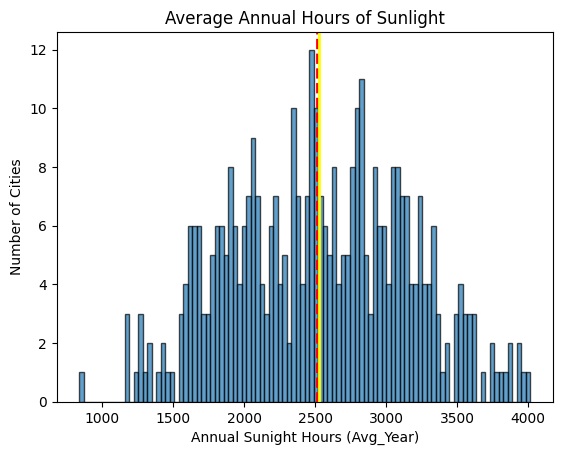

In [38]:
plt.hist(city_with_max_sunlight['Avg_Year'], bins=100, edgecolor='k', alpha=0.7)
plt.axvline(median_value, color='red', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(mean_value, color='yellow', linestyle='solid', linewidth=2, label='Mean')
plt.xlabel('Annual Sunight Hours (Avg_Year)')
plt.ylabel('Number of Cities')
plt.title('Average Annual Hours of Sunlight')
plt.show()

In [39]:
country_avg_sunlight = df.groupby('Country')['Avg_Year'].mean()

country_with_most_sunlight = country_avg_sunlight.idxmax()
max_sunlight_hours = country_avg_sunlight.max()

print(f"The country with the most sunlight hours is {country_with_most_sunlight} with an average of {max_sunlight_hours} hours per year.")


The country with the most sunlight hours is Namibia with an average of 3737.5 hours per year.


In [40]:
country_avg_sunlight = df.groupby('Country')['Avg_Year'].mean()

country_with_least_sunlight = country_avg_sunlight.idxmin()
min_sunlight_hours = country_avg_sunlight.min()

print(f"The country with the least sunlight hours is {country_with_least_sunlight} with an average of {min_sunlight_hours} hours per year.")


The country with the least sunlight hours is Faroe Islands with an average of 840.0 hours per year.


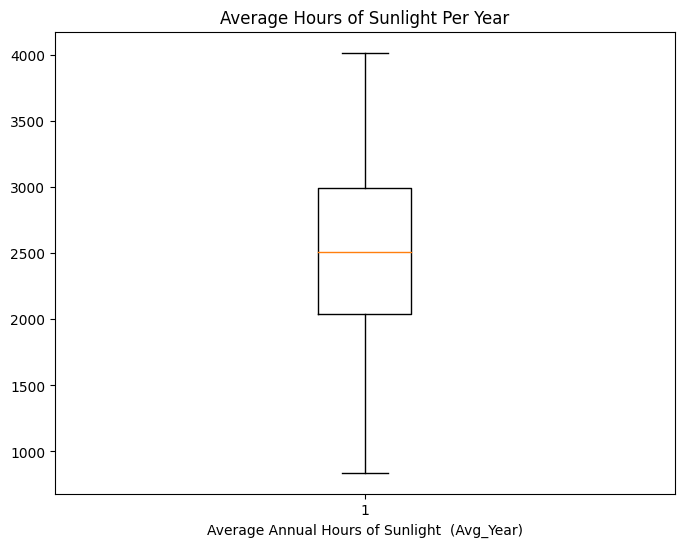

In [41]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.boxplot(df['Avg_Year'])
plt.xlabel('Average Annual Hours of Sunlight  (Avg_Year)')
plt.title('Average Hours of Sunlight Per Year')
plt.show()


In [42]:
num_countries = df['Country'].nunique()
num_countries

141

In [43]:
df_country_average = df.groupby('Country')['Avg_Year'].mean().reset_index()

print(df_country_average)

         Country     Avg_Year
0    Afghanistan  3175.100000
1        Albania  2544.000000
2        Algeria  3266.500000
3         Angola  2341.000000
4      Argentina  2220.300000
..           ...          ...
136   Uzbekistan  2823.900000
137    Venezuela  2895.300000
138      Vietnam  2123.500000
139       Zambia  2965.466667
140     Zimbabwe  3065.400000

[141 rows x 2 columns]


In [44]:

df_new = df.groupby('Country')[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].mean().reset_index()

df_new['Avg_Year'] = df_new[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].mean(axis=1)


df_new = df_new.drop('Avg_Year', axis=1)
df_new

,Country,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Afghanistan,177.200000,178.600000,204.500000,232.500000,310.300000,353.400000,356.800000,339.70,303.900000,282.600000,253.200000,182.400000
1,Albania,124.000000,125.000000,165.000000,191.000000,263.000000,298.000000,354.000000,327.00,264.000000,218.000000,127.000000,88.000000
2,Algeria,223.300000,220.250000,262.200000,292.500000,323.800000,312.000000,353.250000,325.35,262.500000,269.500000,225.000000,204.400000
3,Angola,219.000000,208.000000,213.000000,199.000000,233.000000,223.000000,175.000000,150.00,145.000000,164.000000,199.000000,212.000000
4,Argentina,238.250000,207.066667,185.050000,170.616667,151.466667,123.383333,138.616667,170.40,174.600000,208.566667,222.833333,229.450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,Uzbekistan,117.800000,127.100000,164.300000,216.000000,303.800000,363.000000,384.400000,365.80,300.000000,226.300000,150.000000,105.400000
137,Venezuela,259.133333,243.900000,261.700000,224.666667,217.400000,212.333333,248.100000,248.00,245.833333,251.400000,239.000000,243.933333
138,Vietnam,178.250000,168.000000,190.500000,185.000000,203.500000,182.250000,196.250000,175.00,161.750000,158.500000,157.250000,167.000000
139,Zambia,180.833333,168.933333,221.133333,254.000000,286.233333,278.000000,300.700000,306.90,289.000000,273.833333,223.000000,182.900000


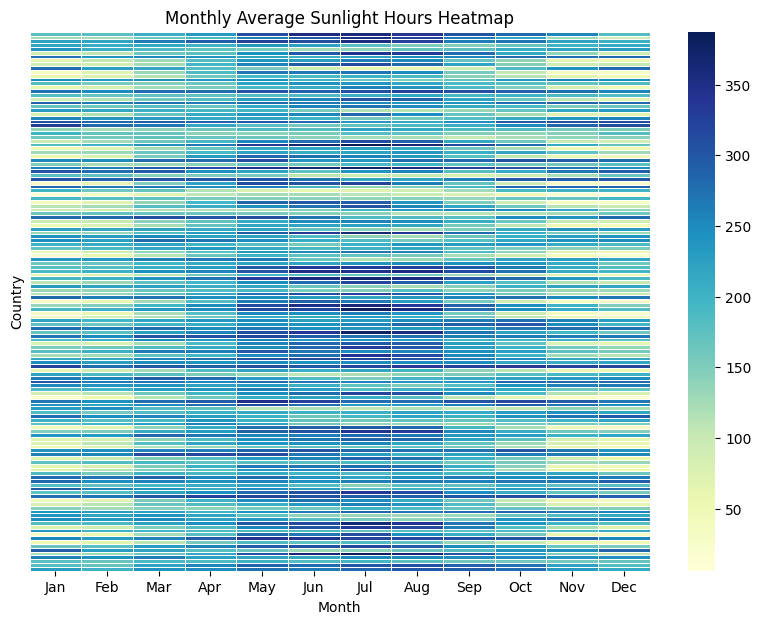

In [45]:
monthly_avg_per_country = df.groupby('Country')[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].mean()

#heatmap plotting
plt.figure(figsize=(10,7))
sns.heatmap(monthly_avg_per_country, cmap='YlGnBu', annot=False, fmt=".1f", linewidths=.5,  yticklabels=False)
plt.xlabel('Month')
plt.title('Monthly Average Sunlight Hours Heatmap')
plt.show()

## Summary

through the data analysis shown above we were able to discover some descriptive statistics. From the 141 countries in the dataset we discovered Namibia to have the greatest number of sunlight hours per year, reaching 3737.5 hours per year. Whilst the lowest country is the Faroe Islands with an average of 840.0 hours per year.

Some further descriptive statistics were discovered such as the median_value 2512.2 hours of sunlight, max_value 4015.3 hours of sunlight, min_value 840 hours of sunlight, mean_value 2523.9 hours of sunlight. Histograms and box plots were plotted to gain a deeper understanding of the descriptive statistics.

the four countries which experience the most sunlight after Namibia are Egypt, Sudan, United Arab Emirates, and Oman, all averaging more than 3400 hours of sunlight per year. The countries which experience the least sunlight following the Faroe Islands are, Iceland, Norway, Saint Pierreand Miquelon, and United Kingdom, all averaging less than 1500 hours of sunlight.

the heatmap in the section above depicts the average hours of sunlight per per month. the heatmap provides an easy to understand chart from which we derive that the most hours of sunlight, depict from dense deep blue colors, are in the months may til august.
